In [1]:
import control
import nonlinear_longitudinal_eoms

In [10]:
nonlin_model = nonlinear_longitudinal_eoms.model()
(xeq, ueq, yeq) = control.find_eqpt(nonlin_model,x0=[90,0,0,0],u0=[0,0],y0=[0,0],ix=[0],iu=[],iy=[1],return_y=True)
state_space_model = control.linearize(nonlin_model, xeq=xeq, ueq=ueq)

s = control.tf('s')
K_p = 1
K_d = 0
PD_controller = K_p + K_d*s

control.series(PD_controller, state_space_model)

control.damp(state_space_model)

control.step_response(state_space_model,)

ValueError: can't multiply systems with incompatible inputs and outputs

In [5]:
theta_el_tf = control.ss2tf(state_space_model)[0,1]
theta_el_tf

ControlMIMONotImplemented: Not implemented for MIMO systems without slycot.

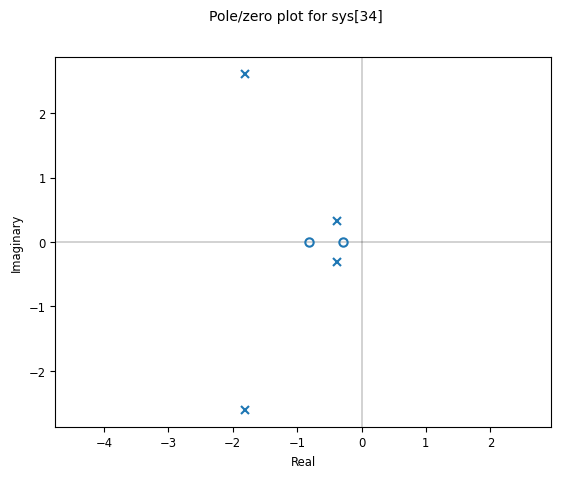

In [10]:
# control.root_locus(theta_el_tf)


Kd = 0
Kp = 1
PD_controller = control.TransferFunction([Kd, Kp], [1])

closed_loop = control.feedback(PD_controller*theta_el_tf)

control.pole_zero_plot(closed_loop)

# control.step_response(closed_loop)

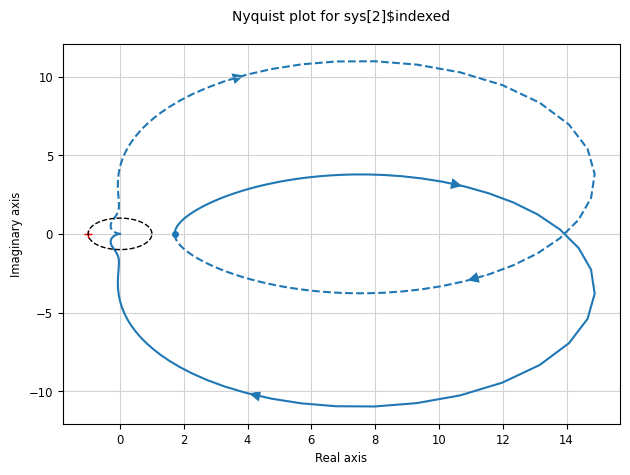

In [5]:
control.nyquist(theta_el_tf,unit_circle=True,)